# Tratamento das Bases de Epilepsia do Rio de Janeiro de 2014 a 2022




## Observações

Para que este notebook funcione corretamente devem ser importadas as bases de dados do SIASUS de 2014 a 2023 de epilepsia do estado do Rio de Janeiro

# Importando as Bases

In [35]:
# Import

import pandas as pd

rj_epilepsia_total = []
for i in range(2014, 2024):
    arquivo = f"../Dados/Bases sem tratamento/rj_epilepsia_{i}.csv"
    epilepsia = pd.read_csv(arquivo, sep = ',', encoding='latin-1')
    rj_epilepsia_total.append(epilepsia)


# Concatenando, Refazendo o Indice e exportando

In [36]:
# Concatenando as bases

rj_epilepsia_total = pd.concat(rj_epilepsia_total)
rj_epilepsia_total

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,...,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR
0,201401,EP,330000,4046374,3314200119395,201401,604500076,0.0,330455,43,...,0,G400,0,NaN,70,160,N,0,N,NaN
1,201401,EP,330000,4046374,3313205302011,201401,604500050,0.0,330455,43,...,0,G400,0,NaN,74,172,N,0,N,NaN
2,201401,EP,330000,4046374,3313205093176,201401,604500084,0.0,330455,43,...,0,G404,0,NaN,53,161,N,0,N,NaN
3,201401,EP,330000,4046374,3314200196615,201401,604500050,0.0,330455,43,...,0,G405,0,NaN,0,0,N,0,N,NaN
4,201401,EP,330000,4046374,3313204973529,201312,604500050,0.0,330455,43,...,0,G408,0,NaN,57,158,N,0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,202312,EP,330000,3343715,3323202910291,202312,604500076,0.0,330455,68,...,0,G408,0,NaN,54,168,N,0,N,1023.0
18788,202312,EP,330000,4046374,3323202750439,202312,604500050,0.0,330455,43,...,0,G402,0,NaN,69,164,N,0,N,1023.0
18789,202312,EP,330000,3343715,3323202639691,202312,604500106,0.0,330455,68,...,0,G402,0,NaN,61,164,N,0,N,1023.0
18790,202312,EP,330000,3343715,3323202592479,202312,604500106,0.0,330455,68,...,0,G403,0,NaN,70,146,N,0,N,1023.0


In [37]:
# Refazendo o Indice

rj_epilepsia_total.index = range(rj_epilepsia_total.shape[0])
rj_epilepsia_total

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,...,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR
0,201401,EP,330000,4046374,3314200119395,201401,604500076,0.0,330455,43,...,0,G400,0,NaN,70,160,N,0,N,NaN
1,201401,EP,330000,4046374,3313205302011,201401,604500050,0.0,330455,43,...,0,G400,0,NaN,74,172,N,0,N,NaN
2,201401,EP,330000,4046374,3313205093176,201401,604500084,0.0,330455,43,...,0,G404,0,NaN,53,161,N,0,N,NaN
3,201401,EP,330000,4046374,3314200196615,201401,604500050,0.0,330455,43,...,0,G405,0,NaN,0,0,N,0,N,NaN
4,201401,EP,330000,4046374,3313204973529,201312,604500050,0.0,330455,43,...,0,G408,0,NaN,57,158,N,0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,EP,330000,3343715,3323202910291,202312,604500076,0.0,330455,68,...,0,G408,0,NaN,54,168,N,0,N,1023.0
103526,202312,EP,330000,4046374,3323202750439,202312,604500050,0.0,330455,43,...,0,G402,0,NaN,69,164,N,0,N,1023.0
103527,202312,EP,330000,3343715,3323202639691,202312,604500106,0.0,330455,68,...,0,G402,0,NaN,61,164,N,0,N,1023.0
103528,202312,EP,330000,3343715,3323202592479,202312,604500106,0.0,330455,68,...,0,G403,0,NaN,70,146,N,0,N,1023.0


In [38]:
# Export 

rj_epilepsia_total.to_csv('../Dados/Base atualizada/rj_epilepsia_total.csv', sep =';')

# Formatando as colunas

## Mudando o nome das Colunas

In [39]:
# Selecionando apenas as colunas que são interessantes para a nossa analise

colunas_desejadas = ['AP_MVM', 'AP_CMP', 'AP_PRIPAL', 'AP_CNSPCN', 'AP_COIDADE', 'AP_NUIDADE', 'AP_DTSOLIC','AP_SEXO', 'AP_RACACOR', 'AP_MUNPCN', 'AP_CEPPCN', 'AP_TPATEN', 'AP_TPAPAC', 'AP_MOTSAI', 'AP_OBITO', 'AP_ENCERR', 'AP_PERMAN', 'AP_ALTA', 'AP_TRANSF', 'AP_DTOCOR', 'AP_APACANT', 'AP_CIDCAS', 'AP_CIDPRI', 'AP_CIDSEC']
rj_epilepsia_total = pd.DataFrame(rj_epilepsia_total[colunas_desejadas])
rj_epilepsia_total

,AP_MVM,AP_CMP,AP_PRIPAL,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_DTSOLIC,AP_SEXO,AP_RACACOR,AP_MUNPCN,...,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_APACANT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,0,1,0,0,NaN,0,0,G400,0
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,0,1,0,0,NaN,0,0,G400,0
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,0,1,0,0,NaN,0,0,G404,0
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,0,1,0,0,NaN,0,0,G405,0
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,0,1,0,0,NaN,0,0,G408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,1,0,0,NaN,0,0,G408,0
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,1,0,0,NaN,0,0,G402,0
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,1,0,0,NaN,0,0,G402,0
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,1,0,0,NaN,0,0,G403,0


In [40]:
# Renomeando as colunas

# novo_nome_colunas = {'AP_MVM': 'data_processamento', 'AP_CMP': 'data_atendimento_paciente', 'AP_PRIPAL': 'procedimento_principal', 'AP_CNSPCN': 'numero_cns_paciente', 'AP_COIDADE': 'codigo_idade_paciente', 'AP_NUIDADE': 'numero_idade', 'AP_SEXO': 'sexo_paciente', 'AP_RACACOR': 'raca_paciente', 'AP_MUNPCN': 'codigo_uf_municipio_residencia', 'AP_CEPPCN': 'cep_paciente', 'AP_TPATEN': 'tipo_atendimento', 'AP_TPAPAC': 'tipo_apac', 'AP_MOTSAI': 'motivo_saida_permanencia', 'AP_OBITO': 'indicador_obito', 'AP_ENCERR': 'indicador_encerramento', 'AP_PERMAN': 'indicador_permanencia', 'AP_ALTA': 'indicador_alta', 'AP_TRANSF': 'indicador_transferencia', 'AP_DTOCOR': 'data_ocorrencia', 'AP_APACANT': 'numero_apac_anterior', 'AP_CIDCAS': 'cid_causas_associadas', 'AP_CIDPRI': 'cid_principal', 'AP_CIDSEC': 'cid_sencundario'}
novo_nome_colunas = {'AP_DTSOLIC':'data_completa_atendimento' ,'AP_MVM': 'data_processamento', 'AP_CMP': 'data_atendimento_paciente', 'AP_PRIPAL': 'procedimento_principal', 'AP_CNSPCN': 'numero_cns_paciente', 'AP_COIDADE': 'codigo_idade_paciente', 'AP_NUIDADE': 'numero_idade', 'AP_SEXO': 'sexo_paciente', 'AP_RACACOR': 'raca_paciente', 'AP_MUNPCN': 'codigo_uf_municipio_residencia', 'AP_CEPPCN': 'cep_paciente', 'AP_TPATEN': 'tipo_atendimento', 'AP_TPAPAC': 'tipo_apac', 'AP_MOTSAI': 'motivo_saida_permanencia', 'AP_OBITO': 'indicador_obito', 'AP_ENCERR': 'indicador_encerramento', 'AP_PERMAN': 'indicador_permanencia', 'AP_ALTA': 'indicador_alta', 'AP_TRANSF': 'indicador_transferencia', 'AP_DTOCOR': 'data_ocorrencia', 'AP_APACANT': 'numero_apac_anterior', 'AP_CIDCAS': 'cid_causas_associadas', 'AP_CIDPRI': 'cid_principal', 'AP_CIDSEC': 'cid_sencundario'}


In [41]:
# Renomeando no DF

rj_epilepsia_total = rj_epilepsia_total.rename(columns=novo_nome_colunas)
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_obito,indicador_encerramento,indicador_permanencia,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,0,1,0,0,NaN,0,0,G400,0
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,0,1,0,0,NaN,0,0,G400,0
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,0,1,0,0,NaN,0,0,G404,0
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,0,1,0,0,NaN,0,0,G405,0
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,0,1,0,0,NaN,0,0,G408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,1,0,0,NaN,0,0,G408,0
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,1,0,0,NaN,0,0,G402,0
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,1,0,0,NaN,0,0,G402,0
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,1,0,0,NaN,0,0,G403,0


In [42]:
rj_epilepsia_total["numero_cns_paciente"].nunique()

5851

In [43]:
rj_epilepsia_total.to_csv('../Dados/Base atualizada/rj_epilepsia_total.csv', sep =';')

## Criando colunas com valores Equivalentes

### Motivo saida permanencia

In [44]:
dic_motivo_saida_permanencia = {
    11: 'Alta_Curado',
    12: 'Alta_Melhorado',
    13: 'Alta_Puerpera_Permanencia',
    14: 'Alta_Pedido',
    15: 'Alta_Previsao_Acompanhamento',
    16: 'Alta_Evasao',
    17: 'Alta_Puerpera_Recem_nascido',
    18: 'Alta_Outros',
    21: 'Permanencia_Caracteristicas_Doenca',
    22: 'Permanencia_Intercorrencia',
    23: 'Permanencia_Impossibilidade_Sociofamiliar',
    24: 'Permanencia_Doador_Vivo',
    25: 'Permanencia_Doador_Morto',
    26: 'Permanencia_Mudanca_Procedimento',
    27: 'Permanencia_Reoperacao',
    28: 'Permanencia_Outros',
    31: 'Transferencia_Outro_Estabelecimento',
    41: 'Obito_Declaracao_Medico_Assistente',
    42: 'Obito_Declaracao_IML',
    43: 'Obito_Declaracao_SVO',
    51: 'Encerramento_Administrativo'
}

In [45]:
rj_epilepsia_total['motivo_saida_permanencia_extenso'] = rj_epilepsia_total['motivo_saida_permanencia'].map(dic_motivo_saida_permanencia)

In [46]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_encerramento,indicador_permanencia,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,1,0,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,1,0,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,1,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,1,0,0,NaN,0,0,G405,0,Permanencia_Caracteristicas_Doenca
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,1,0,0,NaN,0,0,G408,0,Permanencia_Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,1,0,0,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,1,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,1,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,1,0,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca


### Procedimento principal

In [47]:
dic_procedimento_principal = {
    604190018: 'Vigabatrina 500 MG',
    604500084: 'Topiramato 100 MG',
    604500076: 'Topiramato 50 MG',
    604500017: 'Gabapentina 300 MG',
    604500050: 'Lamotrigina 100 MG',
    604500068: 'Topiramato 25 MG',
    604500025: 'Gabapentina 400 MG',
    604500092: 'Levetiracetam 100 MG/ML (Por Frasco de 150 ML)',
    604500122: 'Levetiracetam 100 MG/ML (Por Frasco de 100 ML)',
    604500106: 'Levetiracetam 250 MG',
    604500114: 'Levetiracetam 750 MG'
}

In [48]:
rj_epilepsia_total['procedimento_principal_extenso'] = rj_epilepsia_total['procedimento_principal'].map(dic_procedimento_principal)

In [49]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_permanencia,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,1,0,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,1,0,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,1,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,1,0,0,NaN,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,1,0,0,NaN,0,0,G408,0,Permanencia_Outros,Lamotrigina 100 MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,1,0,0,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,1,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,1,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,1,0,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG


In [50]:
rj_epilepsia_total['codigo_idade_paciente'].drop_duplicates()

0       4
91      3
3098    5
Name: codigo_idade_paciente, dtype: int64

### Codigo do Municipio

In [51]:
dic_codigo_uf_municipio_residencia = {
    330010: 'Angra dos Reis',
    330015: 'Aperibé',
    330020: 'Araruama',
    330022: 'Areal',
    330023: 'Armação dos Búzios',
    330025: 'Arraial do Cabo',
    330040: 'Barra Mansa',
    330030: 'Barra do Piraí',
    330045: 'Belford Roxo',
    330050: 'Bom Jardim',
    330060: 'Bom Jesus do Itabapoana',
    330070: 'Cabo Frio',
    330080: 'Cachoeiras de Macacu',
    330090: 'Cambuci',
    330100: 'Campos dos Goytacazes',
    330110: 'Cantagalo',
    330093: 'Carapebus',
    330115: 'Cardoso Moreira',
    330120: 'Carmo',
    330130: 'Casimiro de Abreu',
    330095: 'Comendador Levy Gasparian',
    330140: 'Conceição de Macabu',
    330150: 'Cordeiro',
    330160: 'Duas Barras',
    330170: 'Duque de Caxias',
    330180: 'Engenheiro Paulo de Frontin',
    330185: 'Guapimirim',
    330187: 'Iguaba Grande',
    330190: 'Itaboraí',
    330200: 'Itaguaí',
    330205: 'Italva',
    330210: 'Itaocara',
    330220: 'Itaperuna',
    330225: 'Itatiaia',
    330227: 'Japeri',
    330230: 'Laje do Muriaé',
    330240: 'Macaé',
    330245: 'Macuco',
    330250: 'Magé',
    330260: 'Mangaratiba',
    330270: 'Maricá',
    330280: 'Mendes',
    330285: 'Mesquita',
    330290: 'Miguel Pereira',
    330300: 'Miracema',
    330310: 'Natividade',
    330320: 'Nilópolis',
    330330: 'Niterói',
    330340: 'Nova Friburgo',
    330350: 'Nova Iguaçu',
    330360: 'Paracambi',
    330370: 'Paraíba do Sul',
    330380: 'Paraty',
    330385: 'Paty do Alferes',
    330390: 'Petrópolis',
    330395: 'Pinheiral',
    330400: 'Piraí',
    330410: 'Porciúncula',
    330411: 'Porto Real',
    330412: 'Quatis',
    330414: 'Queimados',
    330415: 'Quissamã',
    330420: 'Resende',
    330430: 'Rio Bonito',
    330440: 'Rio Claro',
    330450: 'Rio das Flores',
    330452: 'Rio das Ostras',
    330455: 'Rio de Janeiro',
    330460: 'Santa Maria Madalena',
    330470: 'Santo Antônio de Pádua',
    330480: 'São Fidélis',
    330475: 'São Francisco de Itabapoana',
    330490: 'São Gonçalo',
    330500: 'São João da Barra',
    330510: 'São João de Meriti',
    330513: 'São José de Ubá',
    330515: 'São José do Vale do Rio Preto',
    330520: 'São Pedro da Aldeia',
    330530: 'São Sebastião do Alto',
    330540: 'Sapucaia',
    330550: 'Saquarema',
    330555: 'Seropédica',
    330560: 'Silva Jardim',
    330570: 'Sumidouro',
    330575: 'Tanguá',
    330580: 'Teresópolis',
    330590: 'Trajano de Moraes',
    330600: 'Três Rios',
    330610: 'Valença',
    330615: 'Varre-Sai',
    330620: 'Vassouras',
    330630: 'Volta Redonda'
}


In [52]:
rj_epilepsia_total['codigo_uf_municipio_residencia_extenso'] = rj_epilepsia_total['codigo_uf_municipio_residencia'].map(dic_codigo_uf_municipio_residencia)

In [53]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Bom Jardim
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,0,NaN,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Campos dos Goytacazes
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,0,NaN,0,0,G408,0,Permanencia_Outros,Lamotrigina 100 MG,Rio de Janeiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia


In [54]:
# Tem um valor que esta com "nan", que provavelmente é "Engenheiro Paulo de Frontin". Necessita investigar

### Data como primeiro dia do mês

In [55]:
rj_epilepsia_total['data_atendimento'] = pd.to_datetime(rj_epilepsia_total['data_atendimento_paciente'], format='%Y%m')
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Bom Jardim,2014-01-01
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-01-01
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2014-01-01
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,NaN,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Campos dos Goytacazes,2014-01-01
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,NaN,0,0,G408,0,Permanencia_Outros,Lamotrigina 100 MG,Rio de Janeiro,2013-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia,2023-12-01


### Idade

In [56]:
codigo_idade_mapping = {
    3: 'meses',
    4: 'anos',
    5: 'anos'
}

# Função para calcular a idade completa
def calcular_idade_extenso(row):
    codigo = row['codigo_idade_paciente']
    idade = row['numero_idade']
    if codigo == 5:
        idade += 100
    return f"{idade} {codigo_idade_mapping[codigo]}"

# Aplicar a função em cada linha do DataFrame
rj_epilepsia_total['idade_extenso'] = rj_epilepsia_total.apply(calcular_idade_extenso, axis=1)
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Bom Jardim,2014-01-01,41 anos
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-01-01,57 anos
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2014-01-01,14 anos
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,NaN,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Campos dos Goytacazes,2014-01-01,16 anos
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,NaN,0,0,G408,0,Permanencia_Outros,Lamotrigina 100 MG,Rio de Janeiro,2013-12-01,30 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01,89 anos
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01,61 anos
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01,17 anos
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia,2023-12-01,18 anos


In [57]:
# Visualiza os valores unicos da idade
rj_epilepsia_total['idade_extenso'].drop_duplicates()

0          41 anos
1          57 anos
2          14 anos
3          16 anos
4          30 anos
            ...   
50237     103 anos
68326      4 meses
69602      98 anos
83783      99 anos
101765    100 anos
Name: idade_extenso, Length: 113, dtype: object

In [58]:
# Cria uma nova coluna com os valores da idade em decimal. Usa a função lambda para verificar se o codigo é 3 (meses) e dividir por 12, se nao, apenas repete o numero

rj_epilepsia_total['idade_decimal'] = rj_epilepsia_total.apply(lambda row: row['numero_idade'] / 12 if row['codigo_idade_paciente'] == 3 else row['numero_idade'], axis=1)

In [59]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Bom Jardim,2014-01-01,41 anos,41.0
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-01-01,57 anos,57.0
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2014-01-01,14 anos,14.0
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Campos dos Goytacazes,2014-01-01,16 anos,16.0
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,0,G408,0,Permanencia_Outros,Lamotrigina 100 MG,Rio de Janeiro,2013-12-01,30 anos,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01,89 anos,89.0
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01,61 anos,61.0
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01,17 anos,17.0
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia,2023-12-01,18 anos,18.0


# Criterio de exclusao

In [60]:
#Datas de corte
data_inicio = pd.Timestamp('2014-04-01')
data_fim = pd.Timestamp('2023-09-30')

In [61]:
#Selecionando os atendimentos que tiveram alguma dispensação antes ou depois do intervalo selecionado
atendimentos_fora_intervalo = rj_epilepsia_total[(rj_epilepsia_total['data_atendimento'] < data_inicio) | (rj_epilepsia_total['data_atendimento'] > data_fim)]
atendimentos_fora_intervalo

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201401,201401,604500076,âäâ{Ç{{ââ{äâé~ä,4,41,20140102,F,99,330050,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Bom Jardim,2014-01-01,41 anos,41.0
1,201401,201401,604500050,âäâ{{}äÇ~{|{ä},4,57,20131202,M,99,330390,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-01-01,57 anos,57.0
2,201401,201401,604500084,âäâ{{|||~ä|Ç,4,14,20131102,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2014-01-01,14 anos,14.0
3,201401,201401,604500050,âäâ{{{éé{Ç~Çé,4,16,20140102,F,99,330100,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Campos dos Goytacazes,2014-01-01,16 anos,16.0
4,201401,201312,604500050,âäâ{Ç{{||{Ç|Ç~~,4,30,20131102,F,99,330455,...,0,0,G408,0,Permanencia_Outros,Lamotrigina 100 MG,Rio de Janeiro,2013-12-01,30 anos,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103525,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01,89 anos,89.0
103526,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01,61 anos,61.0
103527,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01,17 anos,17.0
103528,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia,2023-12-01,18 anos,18.0


In [62]:
#Selecionando os pacientes unicos que tiveram alguma dispensação antes ou depois do intervalo selecionado
cns_unico_paciente_fora_intervalo = atendimentos_fora_intervalo["numero_cns_paciente"].unique()
cns_unico_paciente_fora_intervalo

# Numero de pacientes unicos retirados
num_pacientes_unicos_fora_intervalo = len(cns_unico_paciente_fora_intervalo)
print("Número de pacientes únicos fora do intervalo:", num_pacientes_unicos_fora_intervalo)

Número de pacientes únicos fora do intervalo: 3386


In [63]:
# Numero de atendimentos totais retirados

ocorrencias_totais_fora_intervalo = rj_epilepsia_total[rj_epilepsia_total['numero_cns_paciente'].isin(cns_unico_paciente_fora_intervalo)].shape[0]
print("Número de ocorrências totais fora do intervalo:", ocorrencias_totais_fora_intervalo)

Número de ocorrências totais fora do intervalo: 77238


In [64]:
# Retirando todas as ocorrencias dos pacientes unicos do DF total

rj_epilepsia_total = rj_epilepsia_total[~rj_epilepsia_total['numero_cns_paciente'].isin(cns_unico_paciente_fora_intervalo)]
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
4154,201404,201404,604500017,âäâ{{}ä|üüüäé,4,44,20140402,F,99,330250,...,0,0,G406,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Magé,2014-04-01,44 anos,44.0
4189,201404,201404,604500050,âäâ{{{}âäüâ{ää,4,58,20140402,M,99,330025,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Arraial do Cabo,2014-04-01,58 anos,58.0
4191,201404,201404,604500076,âäâ{{}~âââäÇ}~,4,24,20140402,M,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
4214,201404,201404,604500017,âäâ{{|{{Çâ|~ââ,4,80,20140402,F,99,330570,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,80 anos,80.0
4216,201404,201404,604500050,é{âü{üÇâ{ü}éâââ,4,23,20140402,F,99,330390,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-04-01,23 anos,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98139,202309,202309,604190018,âäâ{{ü}âÇâÇéé~,4,1,20230704,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-09-01,1 anos,1.0
98168,202309,202309,604500106,é{Ç{{â}â{}~~Ç~,4,23,20230614,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-09-01,23 anos,23.0
98217,202309,202309,604500122,é{~}{âü}~{ääü,4,2,20230519,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,2 anos,2.0
98240,202309,202309,604190018,é{ü{{ü}~||ä}},4,3,20230706,M,3,330240,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Macaé,2023-09-01,3 anos,3.0


In [65]:
# Quantidade de pacientes unicos que restaram

rj_epilepsia_total["numero_cns_paciente"].nunique()

2465

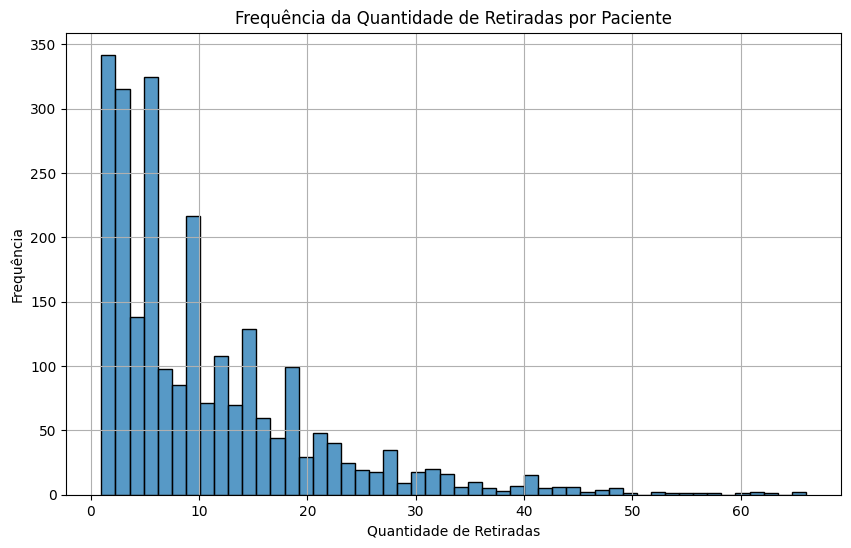

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# rj_epilepsia_total["numero_cns_paciente"].value_counts().sort_values()
retiradas_por_paciente = rj_epilepsia_total.groupby('numero_cns_paciente').size()

plt.figure(figsize=(10, 6))
sns.histplot(retiradas_por_paciente, bins=50, kde=False)
plt.title('Frequência da Quantidade de Retiradas por Paciente')
plt.xlabel('Quantidade de Retiradas')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [67]:
retiradas_por_paciente[retiradas_por_paciente > 3].size

1808

In [68]:
rj_epilepsia_total.index = range(rj_epilepsia_total.shape[0])
rj_epilepsia_total


,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500017,âäâ{{}ä|üüüäé,4,44,20140402,F,99,330250,...,0,0,G406,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Magé,2014-04-01,44 anos,44.0
1,201404,201404,604500050,âäâ{{{}âäüâ{ää,4,58,20140402,M,99,330025,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Arraial do Cabo,2014-04-01,58 anos,58.0
2,201404,201404,604500076,âäâ{{}~âââäÇ}~,4,24,20140402,M,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
3,201404,201404,604500017,âäâ{{|{{Çâ|~ââ,4,80,20140402,F,99,330570,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,80 anos,80.0
4,201404,201404,604500050,é{âü{üÇâ{ü}éâââ,4,23,20140402,F,99,330390,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-04-01,23 anos,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26287,202309,202309,604190018,âäâ{{ü}âÇâÇéé~,4,1,20230704,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-09-01,1 anos,1.0
26288,202309,202309,604500106,é{Ç{{â}â{}~~Ç~,4,23,20230614,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-09-01,23 anos,23.0
26289,202309,202309,604500122,é{~}{âü}~{ääü,4,2,20230519,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,2 anos,2.0
26290,202309,202309,604190018,é{ü{{ü}~||ä}},4,3,20230706,M,3,330240,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Macaé,2023-09-01,3 anos,3.0


# Análise Exploratória

## Por faixa etaria

### Menores de 18 anos

In [69]:
rj_menores_idade = rj_epilepsia_total.loc[rj_epilepsia_total['numero_idade'] < 18]
rj_menores_idade.index = range(rj_menores_idade.shape[0])
rj_menores_idade

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500076,âäâ{Ç{{ÇÇ}äâ~~,4,12,20140402,M,99,330185,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Guapimirim,2014-04-01,12 anos,12.0
1,201404,201404,604500050,}{ä|Ç~{{äÇ{{{â,4,16,20140402,M,99,330515,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,São José do Vale do Rio Preto,2014-04-01,16 anos,16.0
2,201404,201404,604500050,é{|{Çüé{äü}Ç~|,4,4,20140402,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2014-04-01,4 anos,4.0
3,201404,201404,604190018,âäâ{{|{|Ç{{é,4,1,20140402,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2014-04-01,1 anos,1.0
4,201404,201404,604500076,âäâ{{{ü~Çéâü|é,4,13,20140402,F,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,13 anos,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,202309,202309,604190018,é{~{{{â}{Ç}|ééâ,4,4,20230711,M,1,330190,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Itaboraí,2023-09-01,4 anos,4.0
6297,202309,202309,604500122,é{|â{ü}~{éÇé~,4,3,20230710,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,3 anos,3.0
6298,202309,202309,604190018,âäâ{{ü}âÇâÇéé~,4,1,20230704,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-09-01,1 anos,1.0
6299,202309,202309,604500122,é{~}{âü}~{ääü,4,2,20230519,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,2 anos,2.0


### Maiores de 18 anos

In [70]:
rj_maiores_idade = rj_epilepsia_total.loc[rj_epilepsia_total['numero_idade'] > 18]
rj_maiores_idade.index = range(rj_maiores_idade.shape[0])
rj_maiores_idade

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500017,âäâ{{}ä|üüüäé,4,44,20140402,F,99,330250,...,0,0,G406,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Magé,2014-04-01,44 anos,44.0
1,201404,201404,604500050,âäâ{{{}âäüâ{ää,4,58,20140402,M,99,330025,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Arraial do Cabo,2014-04-01,58 anos,58.0
2,201404,201404,604500076,âäâ{{}~âââäÇ}~,4,24,20140402,M,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
3,201404,201404,604500017,âäâ{{|{{Çâ|~ââ,4,80,20140402,F,99,330570,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,80 anos,80.0
4,201404,201404,604500050,é{âü{üÇâ{ü}éâââ,4,23,20140402,F,99,330390,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-04-01,23 anos,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,202309,202309,604500084,é{{Ç{Ç{}~ââ}Ç,4,57,20230706,F,1,330100,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Campos dos Goytacazes,2023-09-01,57 anos,57.0
19532,202309,202309,604500106,é{Ç{{Ç}âéé{}Çü,4,38,20230727,F,1,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-09-01,38 anos,38.0
19533,202309,202309,604500114,é{âü{{Ç~Ç|}ââ~,4,50,20230316,F,1,330490,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 750 MG,São Gonçalo,2023-09-01,50 anos,50.0
19534,202309,202309,604500106,é{Ç{{â}â{}~~Ç~,4,23,20230614,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-09-01,23 anos,23.0


## Por sexo

### Feminino

In [71]:
sexo = ['F']
selecao = rj_epilepsia_total['sexo_paciente'].isin(sexo)

In [72]:
sexo_fem = rj_epilepsia_total[selecao]
sexo_fem

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500017,âäâ{{}ä|üüüäé,4,44,20140402,F,99,330250,...,0,0,G406,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Magé,2014-04-01,44 anos,44.0
3,201404,201404,604500017,âäâ{{|{{Çâ|~ââ,4,80,20140402,F,99,330570,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,80 anos,80.0
4,201404,201404,604500050,é{âü{üÇâ{ü}éâââ,4,23,20140402,F,99,330390,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-04-01,23 anos,23.0
9,201404,201404,604500050,é{|{Çüé{äü}Ç~|,4,4,20140402,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2014-04-01,4 anos,4.0
13,201404,201404,604500025,âäâ{{}ä~{{~äü}},4,36,20140402,F,99,330170,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Gabapentina 400 MG,Duque de Caxias,2014-04-01,36 anos,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26284,202309,202309,604500122,é{}{ä{Ç~{Ç}}}|,4,7,20230707,F,1,330455,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,7 anos,7.0
26286,202309,202309,604500122,é{|â{ü}~{éÇé~,4,3,20230710,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,3 anos,3.0
26288,202309,202309,604500106,é{Ç{{â}â{}~~Ç~,4,23,20230614,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-09-01,23 anos,23.0
26289,202309,202309,604500122,é{~}{âü}~{ääü,4,2,20230519,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,2 anos,2.0


In [73]:
sexo_fem.index = range(sexo_fem.shape[0])
sexo_fem

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500017,âäâ{{}ä|üüüäé,4,44,20140402,F,99,330250,...,0,0,G406,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Magé,2014-04-01,44 anos,44.0
1,201404,201404,604500017,âäâ{{|{{Çâ|~ââ,4,80,20140402,F,99,330570,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,80 anos,80.0
2,201404,201404,604500050,é{âü{üÇâ{ü}éâââ,4,23,20140402,F,99,330390,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-04-01,23 anos,23.0
3,201404,201404,604500050,é{|{Çüé{äü}Ç~|,4,4,20140402,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2014-04-01,4 anos,4.0
4,201404,201404,604500025,âäâ{{}ä~{{~äü}},4,36,20140402,F,99,330170,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Gabapentina 400 MG,Duque de Caxias,2014-04-01,36 anos,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,202309,202309,604500122,é{}{ä{Ç~{Ç}}}|,4,7,20230707,F,1,330455,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,7 anos,7.0
15072,202309,202309,604500122,é{|â{ü}~{éÇé~,4,3,20230710,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,3 anos,3.0
15073,202309,202309,604500106,é{Ç{{â}â{}~~Ç~,4,23,20230614,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-09-01,23 anos,23.0
15074,202309,202309,604500122,é{~}{âü}~{ääü,4,2,20230519,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,2 anos,2.0


In [74]:
# Export

sexo_fem.to_csv('../Dados/Base atualizada/rj_pacientes_fem.csv', sep =';')

### Masculino

In [75]:
sexo = ['M']
selecao = rj_epilepsia_total['sexo_paciente'].isin(sexo)

In [76]:
sexo_masc = rj_epilepsia_total[selecao]
sexo_masc

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
1,201404,201404,604500050,âäâ{{{}âäüâ{ää,4,58,20140402,M,99,330025,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Arraial do Cabo,2014-04-01,58 anos,58.0
2,201404,201404,604500076,âäâ{{}~âââäÇ}~,4,24,20140402,M,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
5,201404,201404,604500050,âäâ{{}ä{üé|Çüé},4,72,20140402,M,99,330190,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Itaboraí,2014-04-01,72 anos,72.0
6,201404,201404,604500017,âäâ{{|}ä{âéäü{é,4,50,20140402,M,99,330570,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,50 anos,50.0
7,201404,201404,604500076,âäâ{Ç{{ÇÇ}äâ~~,4,12,20140402,M,99,330185,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Guapimirim,2014-04-01,12 anos,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26279,202309,202309,604500050,âäâ{{}é{â}âü|~ä,4,13,20230721,M,2,330630,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Volta Redonda,2023-09-01,13 anos,13.0
26282,202309,202309,604190018,é{ü{~|{ä{~é|â|,4,1,20230626,M,3,330350,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Nova Iguaçu,2023-09-01,1 anos,1.0
26285,202309,202309,604190018,é{~{{{â}{Ç}|ééâ,4,4,20230711,M,1,330190,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Itaboraí,2023-09-01,4 anos,4.0
26287,202309,202309,604190018,âäâ{{ü}âÇâÇéé~,4,1,20230704,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-09-01,1 anos,1.0


In [77]:
sexo_masc.index = range(sexo_masc.shape[0])
sexo_masc

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500050,âäâ{{{}âäüâ{ää,4,58,20140402,M,99,330025,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Arraial do Cabo,2014-04-01,58 anos,58.0
1,201404,201404,604500076,âäâ{{}~âââäÇ}~,4,24,20140402,M,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
2,201404,201404,604500050,âäâ{{}ä{üé|Çüé},4,72,20140402,M,99,330190,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Itaboraí,2014-04-01,72 anos,72.0
3,201404,201404,604500017,âäâ{{|}ä{âéäü{é,4,50,20140402,M,99,330570,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,50 anos,50.0
4,201404,201404,604500076,âäâ{Ç{{ÇÇ}äâ~~,4,12,20140402,M,99,330185,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Guapimirim,2014-04-01,12 anos,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11211,202309,202309,604500050,âäâ{{}é{â}âü|~ä,4,13,20230721,M,2,330630,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Volta Redonda,2023-09-01,13 anos,13.0
11212,202309,202309,604190018,é{ü{~|{ä{~é|â|,4,1,20230626,M,3,330350,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Nova Iguaçu,2023-09-01,1 anos,1.0
11213,202309,202309,604190018,é{~{{{â}{Ç}|ééâ,4,4,20230711,M,1,330190,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Itaboraí,2023-09-01,4 anos,4.0
11214,202309,202309,604190018,âäâ{{ü}âÇâÇéé~,4,1,20230704,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-09-01,1 anos,1.0


In [78]:
# Export

sexo_masc.to_csv('../Dados/Base atualizada/rj_pacientes_masc.csv', sep =';')

### Sobre os sexos


In [79]:
# Criando um DF com o sexo e CNS apenas

colunas = ['sexo_paciente', 'numero_cns_paciente']
contagem_sexo = rj_epilepsia_total.filter(items=colunas)
contagem_sexo

,sexo_paciente,numero_cns_paciente
0,F,âäâ{{}ä|üüüäé
1,M,âäâ{{{}âäüâ{ää
2,M,âäâ{{}~âââäÇ}~
3,F,âäâ{{|{{Çâ|~ââ
4,F,é{âü{üÇâ{ü}éâââ
...,...,...
26287,M,âäâ{{ü}âÇâÇéé~
26288,F,é{Ç{{â}â{}~~Ç~
26289,F,é{~}{âü}~{ääü
26290,M,é{ü{{ü}~||ä}}


In [80]:
contagem_sexo.drop_duplicates('numero_cns_paciente')

,sexo_paciente,numero_cns_paciente
0,F,âäâ{{}ä|üüüäé
1,M,âäâ{{{}âäüâ{ää
2,M,âäâ{{}~âââäÇ}~
3,F,âäâ{{|{{Çâ|~ââ
4,F,é{âü{üÇâ{ü}éâââ
...,...,...
26058,F,é{âü{{Ç~Ç|}ââ~
26074,F,âäâ{{ü}âÇéé}â
26108,M,é{~ü{é{äüÇüâä~~
26110,F,é{é{éé|äüé~é~ü


In [81]:
sexo_pacientes_unicos = contagem_sexo.drop_duplicates('numero_cns_paciente')
sexo_pacientes_unicos.index = range(sexo_pacientes_unicos.shape[0])
sexo_pacientes_unicos

,sexo_paciente,numero_cns_paciente
0,F,âäâ{{}ä|üüüäé
1,M,âäâ{{{}âäüâ{ää
2,M,âäâ{{}~âââäÇ}~
3,F,âäâ{{|{{Çâ|~ââ
4,F,é{âü{üÇâ{ü}éâââ
...,...,...
2460,F,é{âü{{Ç~Ç|}ââ~
2461,F,âäâ{{ü}âÇéé}â
2462,M,é{~ü{é{äüÇüâä~~
2463,F,é{é{éé|äüé~é~ü


In [82]:
# Export

sexo_pacientes_unicos.to_csv('../Dados/Base atualizada/rj_sexo_pacientes_unicos.csv', sep =';')

In [83]:
# Contagem de Pacientes Unicos por sexo

contagem_sexo.drop_duplicates('numero_cns_paciente').groupby('sexo_paciente').count()

,numero_cns_paciente
sexo_paciente,
F,1432
M,1033


In [84]:
# Export

contagem_sexo.to_csv('../Dados/Base atualizada/rj_quantidade_pacientes_masc_fem.csv', sep =';')

In [85]:
contagem_sexo.drop_duplicates('numero_cns_paciente').groupby('sexo_paciente').count().to_csv('../Dados/Base atualizada/rj_quantidade_pacientes_masc_fem_unicosss.csv', sep =';')

## Por mes de atendimento

### Por mês de atendimento (paciente x mes)

In [86]:
# Tabela com os pacientes unicos nas linhas e as datas dos procedimentos nas colunas

pacientes_data_atendimento = pd.pivot_table(rj_epilepsia_total, values='sexo_paciente', index=['numero_cns_paciente'],
                       columns=['data_atendimento'], aggfunc='count', fill_value=0)
pacientes_data_atendimento

data_atendimento,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,...,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
numero_cns_paciente,,,,,,,,,,,,,,,,,,,,,
|{{|{â{äâü|{{|â,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
|{{äéé|Ç}{{{{},0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
|{||}}{~}{{{{,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
|{||éâ{â{{{{{,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
|{~~|{ü}éâé{{{Ç,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
é{üé{ÇÇää{ââ|,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
é{üé{äÇä~Ç~â|Ç,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
é{üé{ééä|Ç}}{,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,1,0,0


### Por mês de atendimento (medicamento x mes)

In [87]:
# Export

pacientes_data_atendimento.to_csv('../Dados/Base atualizada/rj_pacientes_unicos_data_atendimento.csv', sep =';')

In [88]:
# Tabela com os pacientes unicos nas linhas e as datas dos procedimentos nas colunas

procedimento_mes_atendimento = pd.pivot_table(rj_epilepsia_total, values='numero_cns_paciente', index=['procedimento_principal_extenso'],
                       columns=['data_atendimento'], aggfunc='count', fill_value=0)
procedimento_mes_atendimento

data_atendimento,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,...,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
procedimento_principal_extenso,,,,,,,,,,,,,,,,,,,,,
Gabapentina 300 MG,11,21,31,10,1,1,1,53,84,90,...,7,8,7,7,6,5,2,2,2,0
Gabapentina 400 MG,8,9,9,10,14,14,14,12,10,18,...,1,1,1,1,0,0,0,0,0,0
Lamotrigina 100 MG,25,35,54,23,7,4,6,6,9,7,...,67,64,57,51,44,28,23,21,12,6
Levetiracetam 100 MG/ML (Por Frasco de 100 ML),0,0,0,0,0,0,0,0,0,0,...,23,20,19,21,25,23,16,14,12,7
Levetiracetam 250 MG,0,0,0,0,0,0,0,0,0,0,...,27,27,13,29,26,24,14,14,12,6
Levetiracetam 750 MG,0,0,0,0,0,0,0,0,0,0,...,30,26,26,26,18,18,13,10,9,6
Topiramato 100 MG,10,19,27,39,37,48,57,63,65,61,...,20,20,19,17,11,15,9,7,3,2
Topiramato 25 MG,9,14,20,24,33,40,38,43,43,46,...,7,7,7,7,5,3,1,4,4,3
Topiramato 50 MG,14,16,28,39,42,51,61,61,57,61,...,9,12,9,8,12,7,5,2,1,0


In [89]:
# Export

procedimento_mes_atendimento.to_csv('../Dados/Base atualizada/rj_medicamentos_mes.csv', sep =';')

## Sobre o tratamento

### Pacientes por tipo de medicamento

#### Topiramato

In [90]:
topiramato = [604500076, 604500084, 604500068]
selecao = rj_epilepsia_total['procedimento_principal'].isin(topiramato)

In [91]:
pacientes_topiramato = rj_epilepsia_total[selecao]
pacientes_topiramato

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
2,201404,201404,604500076,âäâ{{}~âââäÇ}~,4,24,20140402,M,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
7,201404,201404,604500076,âäâ{Ç{{ÇÇ}äâ~~,4,12,20140402,M,99,330185,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Guapimirim,2014-04-01,12 anos,12.0
14,201404,201404,604500084,é{äâ{{{~}ä~üéäé,4,24,20140402,F,99,330455,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
16,201404,201404,604500076,âäâ{{{ü~Çéâü|é,4,13,20140402,F,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,13 anos,13.0
17,201404,201404,604500076,âäâ{{{ä~~}|~ü},4,8,20140402,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,8 anos,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26255,202309,202309,604500068,âäâ{{||â~ü{ü,4,12,20221003,M,3,330080,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 25 MG,Cachoeiras de Macacu,2023-09-01,12 anos,12.0
26260,202309,202309,604500084,é{{{~~éüääâäü},4,73,20230703,F,1,330440,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio Claro,2023-09-01,73 anos,73.0
26264,202309,202309,604500068,é{{{{~Ç~ééÇ}{Ç,4,31,20230704,M,3,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 25 MG,São Fidélis,2023-09-01,31 anos,31.0
26273,202309,202309,604500068,é{}{{{~{üéâ}{â},4,58,20230704,M,2,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 25 MG,São Fidélis,2023-09-01,58 anos,58.0


In [92]:
pacientes_topiramato.index = range(pacientes_topiramato.shape[0])
pacientes_topiramato

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500076,âäâ{{}~âââäÇ}~,4,24,20140402,M,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
1,201404,201404,604500076,âäâ{Ç{{ÇÇ}äâ~~,4,12,20140402,M,99,330185,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Guapimirim,2014-04-01,12 anos,12.0
2,201404,201404,604500084,é{äâ{{{~}ä~üéäé,4,24,20140402,F,99,330455,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
3,201404,201404,604500076,âäâ{{{ü~Çéâü|é,4,13,20140402,F,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,13 anos,13.0
4,201404,201404,604500076,âäâ{{{ä~~}|~ü},4,8,20140402,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,8 anos,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9488,202309,202309,604500068,âäâ{{||â~ü{ü,4,12,20221003,M,3,330080,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 25 MG,Cachoeiras de Macacu,2023-09-01,12 anos,12.0
9489,202309,202309,604500084,é{{{~~éüääâäü},4,73,20230703,F,1,330440,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio Claro,2023-09-01,73 anos,73.0
9490,202309,202309,604500068,é{{{{~Ç~ééÇ}{Ç,4,31,20230704,M,3,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 25 MG,São Fidélis,2023-09-01,31 anos,31.0
9491,202309,202309,604500068,é{}{{{~{üéâ}{â},4,58,20230704,M,2,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 25 MG,São Fidélis,2023-09-01,58 anos,58.0


In [93]:
# Export

pacientes_topiramato.to_csv('../Dados/Base atualizada/rj_pacientes_topiramato.csv', sep =';')

#### Vigabatrina

In [94]:
vigabatrina = [604190018]
selecao = rj_epilepsia_total['procedimento_principal'].isin(vigabatrina)

In [95]:
pacientes_vigabatrina = rj_epilepsia_total[selecao]
pacientes_vigabatrina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
10,201404,201404,604190018,âäâ{{|{|Ç{{é,4,1,20140402,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2014-04-01,1 anos,1.0
28,201404,201404,604190018,|üÇääâÇää~{{{},4,16,20140402,M,99,330470,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Santo Antônio de Pádua,2014-04-01,16 anos,16.0
47,201404,201404,604190018,âäâ{{~âü{â{}éü,4,1,20140402,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2014-04-01,1 anos,1.0
62,201404,201404,604190018,âäâ{{~é|â|~{ä~,4,2,20140402,F,99,330170,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Duque de Caxias,2014-04-01,2 anos,2.0
71,201404,201404,604190018,âäâ{{|}|||äÇä,4,10,20140402,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2014-04-01,10 anos,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26282,202309,202309,604190018,é{ü{~|{ä{~é|â|,4,1,20230626,M,3,330350,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Nova Iguaçu,2023-09-01,1 anos,1.0
26283,202309,202309,604190018,é{{{{{éü{éäÇü{{,4,1,20230713,F,1,330220,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Itaperuna,2023-09-01,1 anos,1.0
26285,202309,202309,604190018,é{~{{{â}{Ç}|ééâ,4,4,20230711,M,1,330190,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Itaboraí,2023-09-01,4 anos,4.0
26287,202309,202309,604190018,âäâ{{ü}âÇâÇéé~,4,1,20230704,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-09-01,1 anos,1.0


In [96]:
pacientes_vigabatrina.index = range(pacientes_vigabatrina.shape[0])
pacientes_vigabatrina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604190018,âäâ{{|{|Ç{{é,4,1,20140402,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2014-04-01,1 anos,1.0
1,201404,201404,604190018,|üÇääâÇää~{{{},4,16,20140402,M,99,330470,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Santo Antônio de Pádua,2014-04-01,16 anos,16.0
2,201404,201404,604190018,âäâ{{~âü{â{}éü,4,1,20140402,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2014-04-01,1 anos,1.0
3,201404,201404,604190018,âäâ{{~é|â|~{ä~,4,2,20140402,F,99,330170,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Duque de Caxias,2014-04-01,2 anos,2.0
4,201404,201404,604190018,âäâ{{|}|||äÇä,4,10,20140402,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2014-04-01,10 anos,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,202309,202309,604190018,é{ü{~|{ä{~é|â|,4,1,20230626,M,3,330350,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Nova Iguaçu,2023-09-01,1 anos,1.0
1992,202309,202309,604190018,é{{{{{éü{éäÇü{{,4,1,20230713,F,1,330220,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Itaperuna,2023-09-01,1 anos,1.0
1993,202309,202309,604190018,é{~{{{â}{Ç}|ééâ,4,4,20230711,M,1,330190,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Itaboraí,2023-09-01,4 anos,4.0
1994,202309,202309,604190018,âäâ{{ü}âÇâÇéé~,4,1,20230704,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-09-01,1 anos,1.0


In [97]:
# Export

pacientes_vigabatrina.to_csv('../Dados/Base atualizada/rj_pacientes_vigabatrina.csv', sep =';')

#### Gabapentina

In [98]:
gabapentina = [604500017, 604500025]
selecao = rj_epilepsia_total['procedimento_principal'].isin(gabapentina)

In [99]:
pacientes_gabapentina = rj_epilepsia_total[selecao]
pacientes_gabapentina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500017,âäâ{{}ä|üüüäé,4,44,20140402,F,99,330250,...,0,0,G406,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Magé,2014-04-01,44 anos,44.0
3,201404,201404,604500017,âäâ{{|{{Çâ|~ââ,4,80,20140402,F,99,330570,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,80 anos,80.0
6,201404,201404,604500017,âäâ{{|}ä{âéäü{é,4,50,20140402,M,99,330570,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,50 anos,50.0
13,201404,201404,604500025,âäâ{{}ä~{{~äü}},4,36,20140402,F,99,330170,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Gabapentina 400 MG,Duque de Caxias,2014-04-01,36 anos,36.0
19,201404,201404,604500025,âäâ{{|{|äââä}â,4,56,20140402,M,99,330070,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 400 MG,Cabo Frio,2014-04-01,56 anos,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25990,202306,202306,604500017,é{{Ç{ÇÇ~{Ç}Ç|,4,72,20230616,F,3,330400,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Piraí,2023-06-01,72 anos,72.0
26122,202307,202307,604500017,é{ü{{â~é}ääâ,4,40,20230628,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Rio de Janeiro,2023-07-01,40 anos,40.0
26154,202307,202307,604500017,é{{Ç{ÇÇ~{Ç}Ç|,4,72,20230616,F,3,330400,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Piraí,2023-07-01,72 anos,72.0
26186,202308,202308,604500017,é{ü{{â~é}ääâ,4,40,20230628,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Rio de Janeiro,2023-08-01,40 anos,40.0


In [100]:
pacientes_gabapentina.index = range(pacientes_gabapentina.shape[0])
pacientes_gabapentina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500017,âäâ{{}ä|üüüäé,4,44,20140402,F,99,330250,...,0,0,G406,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Magé,2014-04-01,44 anos,44.0
1,201404,201404,604500017,âäâ{{|{{Çâ|~ââ,4,80,20140402,F,99,330570,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,80 anos,80.0
2,201404,201404,604500017,âäâ{{|}ä{âéäü{é,4,50,20140402,M,99,330570,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,50 anos,50.0
3,201404,201404,604500025,âäâ{{}ä~{{~äü}},4,36,20140402,F,99,330170,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Gabapentina 400 MG,Duque de Caxias,2014-04-01,36 anos,36.0
4,201404,201404,604500025,âäâ{{|{|äââä}â,4,56,20140402,M,99,330070,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 400 MG,Cabo Frio,2014-04-01,56 anos,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,202306,202306,604500017,é{{Ç{ÇÇ~{Ç}Ç|,4,72,20230616,F,3,330400,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Piraí,2023-06-01,72 anos,72.0
4810,202307,202307,604500017,é{ü{{â~é}ääâ,4,40,20230628,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Rio de Janeiro,2023-07-01,40 anos,40.0
4811,202307,202307,604500017,é{{Ç{ÇÇ~{Ç}Ç|,4,72,20230616,F,3,330400,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Piraí,2023-07-01,72 anos,72.0
4812,202308,202308,604500017,é{ü{{â~é}ääâ,4,40,20230628,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Rio de Janeiro,2023-08-01,40 anos,40.0


In [101]:
# Export

pacientes_gabapentina.to_csv('../Dados/Base atualizada/rj_pacientes_gabapentina.csv', sep =';')

#### Lamotrigina

In [102]:
lamotrigina = [604500050]
selecao = rj_epilepsia_total['procedimento_principal'].isin(lamotrigina)

In [103]:
pacientes_lamotrigina = rj_epilepsia_total[selecao]
pacientes_lamotrigina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
1,201404,201404,604500050,âäâ{{{}âäüâ{ää,4,58,20140402,M,99,330025,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Arraial do Cabo,2014-04-01,58 anos,58.0
4,201404,201404,604500050,é{âü{üÇâ{ü}éâââ,4,23,20140402,F,99,330390,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-04-01,23 anos,23.0
5,201404,201404,604500050,âäâ{{}ä{üé|Çüé},4,72,20140402,M,99,330190,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Itaboraí,2014-04-01,72 anos,72.0
8,201404,201404,604500050,}{ä|Ç~{{äÇ{{{â,4,16,20140402,M,99,330515,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,São José do Vale do Rio Preto,2014-04-01,16 anos,16.0
9,201404,201404,604500050,é{|{Çüé{äü}Ç~|,4,4,20140402,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2014-04-01,4 anos,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26257,202309,202309,604500050,|ü|Çâé~|ä{{{|,4,22,20230717,M,3,330340,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Nova Friburgo,2023-09-01,22 anos,22.0
26259,202309,202309,604500050,é{é{éé|äüé~é~ü,4,61,20230523,F,1,330490,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,São Gonçalo,2023-09-01,61 anos,61.0
26261,202309,202309,604500050,é{ü~{ééâä~~ââé|,4,30,20230615,M,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-09-01,30 anos,30.0
26272,202309,202309,604500050,âäâ{{||ä{ââÇ~ü,4,15,20230711,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-09-01,15 anos,15.0


In [104]:
pacientes_lamotrigina.index = range(pacientes_lamotrigina.shape[0])
pacientes_lamotrigina

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500050,âäâ{{{}âäüâ{ää,4,58,20140402,M,99,330025,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Arraial do Cabo,2014-04-01,58 anos,58.0
1,201404,201404,604500050,é{âü{üÇâ{ü}éâââ,4,23,20140402,F,99,330390,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-04-01,23 anos,23.0
2,201404,201404,604500050,âäâ{{}ä{üé|Çüé},4,72,20140402,M,99,330190,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Itaboraí,2014-04-01,72 anos,72.0
3,201404,201404,604500050,}{ä|Ç~{{äÇ{{{â,4,16,20140402,M,99,330515,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,São José do Vale do Rio Preto,2014-04-01,16 anos,16.0
4,201404,201404,604500050,é{|{Çüé{äü}Ç~|,4,4,20140402,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2014-04-01,4 anos,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,202309,202309,604500050,|ü|Çâé~|ä{{{|,4,22,20230717,M,3,330340,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Nova Friburgo,2023-09-01,22 anos,22.0
8018,202309,202309,604500050,é{é{éé|äüé~é~ü,4,61,20230523,F,1,330490,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,São Gonçalo,2023-09-01,61 anos,61.0
8019,202309,202309,604500050,é{ü~{ééâä~~ââé|,4,30,20230615,M,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-09-01,30 anos,30.0
8020,202309,202309,604500050,âäâ{{||ä{ââÇ~ü,4,15,20230711,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-09-01,15 anos,15.0


In [105]:
# Export

pacientes_lamotrigina.to_csv('../Dados/Base atualizada/rj_pacientes_lamotrigina.csv', sep =';')

#### Levetiracetam

In [106]:
levetiracetam = [604500092, 604500122 , 604500106, 604500114]
selecao = rj_epilepsia_total['procedimento_principal'].isin(levetiracetam)

In [107]:
pacientes_levetiracetam = rj_epilepsia_total[selecao]
pacientes_levetiracetam

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
17722,202006,202006,604500122,âäâ{{Çâ}ü~{é|é,4,2,20200608,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-06-01,2 anos,2.0
18206,202008,202007,604500122,é{{{{âéâéü|~{},4,3,20200617,M,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-07-01,3 anos,3.0
18215,202008,202007,604500122,âäâ{{Çâ}ü~{é|é,4,2,20200608,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-07-01,2 anos,2.0
18252,202008,202008,604500122,é{{{{âéâéü|~{},4,3,20200617,M,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-08-01,3 anos,3.0
18317,202008,202008,604500122,âäâ{{Çâ}ü~{é|é,4,2,20200608,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-08-01,2 anos,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26284,202309,202309,604500122,é{}{ä{Ç~{Ç}}}|,4,7,20230707,F,1,330455,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,7 anos,7.0
26286,202309,202309,604500122,é{|â{ü}~{éÇé~,4,3,20230710,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,3 anos,3.0
26288,202309,202309,604500106,é{Ç{{â}â{}~~Ç~,4,23,20230614,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-09-01,23 anos,23.0
26289,202309,202309,604500122,é{~}{âü}~{ääü,4,2,20230519,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,2 anos,2.0


In [108]:
pacientes_levetiracetam.index = range(pacientes_levetiracetam.shape[0])
pacientes_levetiracetam

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,202006,202006,604500122,âäâ{{Çâ}ü~{é|é,4,2,20200608,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-06-01,2 anos,2.0
1,202008,202007,604500122,é{{{{âéâéü|~{},4,3,20200617,M,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-07-01,3 anos,3.0
2,202008,202007,604500122,âäâ{{Çâ}ü~{é|é,4,2,20200608,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-07-01,2 anos,2.0
3,202008,202008,604500122,é{{{{âéâéü|~{},4,3,20200617,M,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-08-01,3 anos,3.0
4,202008,202008,604500122,âäâ{{Çâ}ü~{é|é,4,2,20200608,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2020-08-01,2 anos,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,202309,202309,604500122,é{}{ä{Ç~{Ç}}}|,4,7,20230707,F,1,330455,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,7 anos,7.0
1963,202309,202309,604500122,é{|â{ü}~{éÇé~,4,3,20230710,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,3 anos,3.0
1964,202309,202309,604500106,é{Ç{{â}â{}~~Ç~,4,23,20230614,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-09-01,23 anos,23.0
1965,202309,202309,604500122,é{~}{âü}~{ääü,4,2,20230519,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,2 anos,2.0


In [109]:
# Export

pacientes_levetiracetam.to_csv('../Dados/Base atualizada/rj_pacientes_levetiracetam.csv', sep =';')

### Primeiro e último dia do tratamento

In [110]:
# Encontrar a primeira data de atendimento para cada paciente
primeira_data = rj_epilepsia_total.groupby('numero_cns_paciente').agg({'data_atendimento': 'min', 'sexo_paciente': 'first', 'numero_idade':'first'}).reset_index()
primeira_data.columns = ['numero_cns_paciente', 'primeira_data_atendimento', 'sexo_paciente', 'numero_idade']

In [111]:
# Encontrar a última data de atendimento para cada paciente
ultima_data = rj_epilepsia_total.groupby('numero_cns_paciente').agg({'data_atendimento': 'max'}).reset_index()
ultima_data.columns = ['numero_cns_paciente', 'ultima_data_atendimento']

In [112]:
# Mesclar os DataFrames das primeiras e últimas datas
datas_atendimento = pd.merge(primeira_data, ultima_data, on='numero_cns_paciente')
datas_atendimento

,numero_cns_paciente,primeira_data_atendimento,sexo_paciente,numero_idade,ultima_data_atendimento
0,|{{|{â{äâü|{{|â,2014-11-01,F,86,2020-05-01
1,|{{äéé|Ç}{{{{},2014-11-01,M,58,2015-10-01
2,|{||}}{~}{{{{,2014-12-01,F,68,2015-10-01
3,|{||éâ{â{{{{{,2015-09-01,F,80,2015-10-01
4,|{~~|{ü}éâé{{{Ç,2017-09-01,M,42,2017-09-01
...,...,...,...,...,...
2460,é{üé{ÇÇää{ââ|,2018-04-01,F,38,2021-08-01
2461,é{üé{äÇä~Ç~â|Ç,2021-09-01,M,18,2023-04-01
2462,é{üé{ééä|Ç}}{,2022-08-01,M,48,2023-07-01
2463,é{üé{ü}~Çéé{é}{,2016-07-01,F,54,2016-09-01


### Entrada, saida e troca

#### Quantos pacientes entraram para o tratamento ano a ano

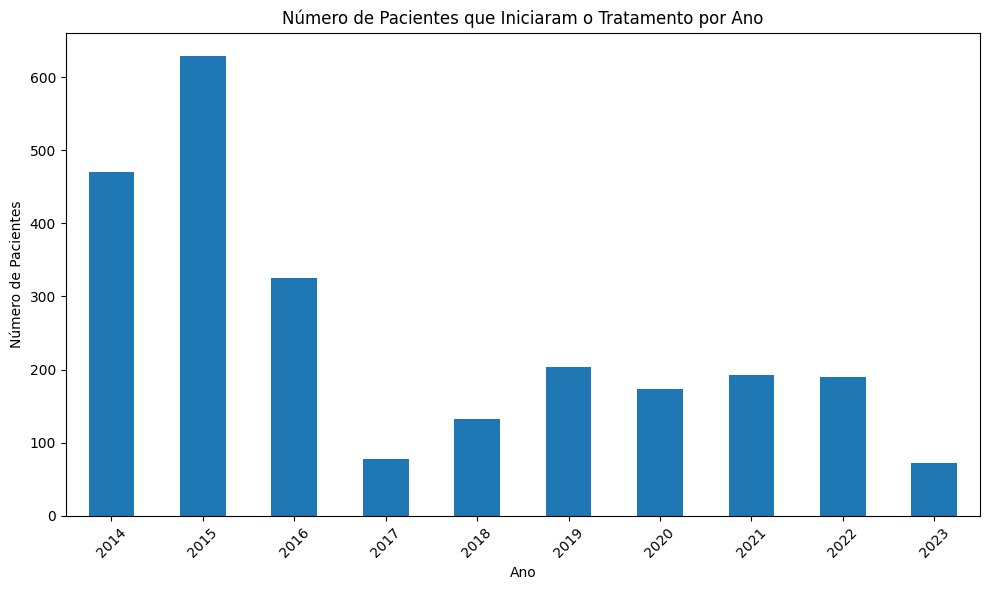

In [113]:
import matplotlib.pyplot as plt

datas_atendimento['ano_inicio'] = datas_atendimento['primeira_data_atendimento'].dt.year
pacientes_por_ano = datas_atendimento.groupby('ano_inicio')['numero_cns_paciente'].nunique()

plt.figure(figsize=(10, 6))
pacientes_por_ano.plot(kind='bar')
plt.title('Número de Pacientes que Iniciaram o Tratamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pacientes_iniciaram_tratamento_por_ano.png')
plt.show()

#### Quantos pacientes sairam do tratamento ano a ano

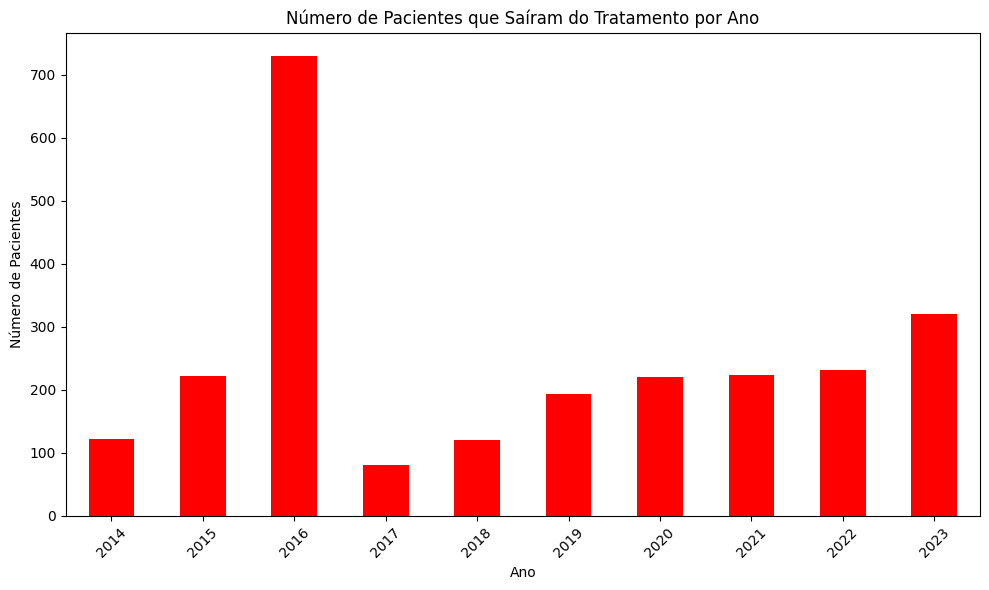

In [114]:
# Extrair o ano da coluna 'ultima_data_atendimento'
datas_atendimento.loc[:, 'ano_saida'] = datas_atendimento['ultima_data_atendimento'].dt.year

# Contar o número de pacientes que saíram do tratamento por ano
pacientes_por_ano_saida = datas_atendimento.groupby('ano_saida')['numero_cns_paciente'].nunique()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
pacientes_por_ano_saida.plot(kind='bar', color='red')
plt.title('Número de Pacientes que Saíram do Tratamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pacientes_sairam_tratamento_por_ano.png')
plt.show()

#### Quantos pacientes trocaram de tratamento ano a ano

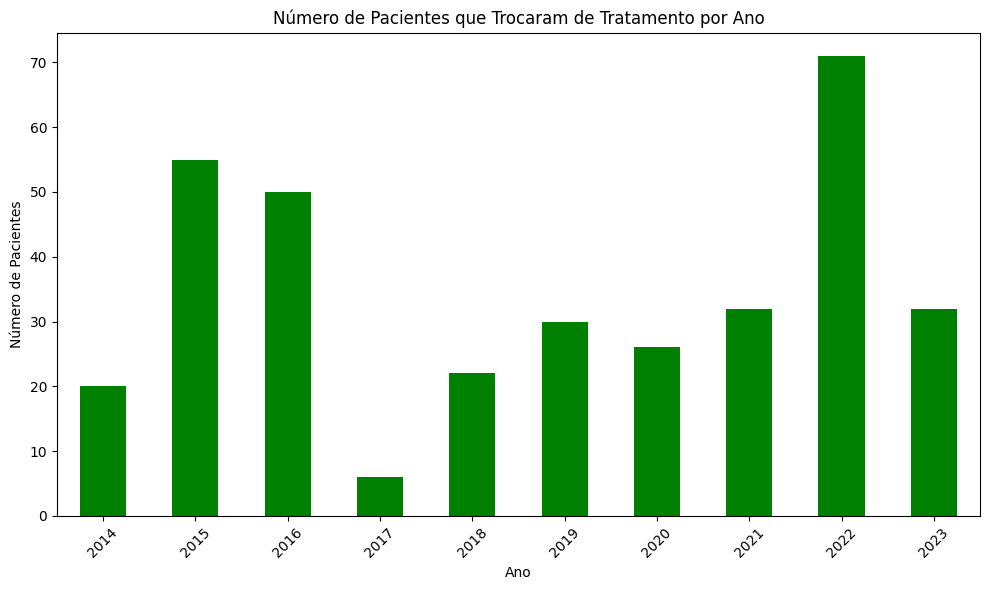

In [115]:
# Criar uma cópia do DataFrame original
df_copia = rj_epilepsia_total.copy()

# Converter as colunas de data para datetime
df_copia['data_atendimento'] = pd.to_datetime(df_copia['data_atendimento'])

# Ordenar os dados por paciente e data de atendimento
df_copia.sort_values(by=['numero_cns_paciente', 'data_atendimento'], inplace=True)

# Detectar mudanças no tratamento para cada paciente, ignorando o primeiro tratamento
df_copia['tratamento_anterior'] = df_copia.groupby('numero_cns_paciente')['procedimento_principal_extenso'].shift()
df_copia['mudanca_tratamento'] = (df_copia['tratamento_anterior'] != df_copia['procedimento_principal_extenso']) & df_copia['tratamento_anterior'].notna()

# Filtrar apenas as mudanças de tratamento
mudancas_tratamento = df_copia[df_copia['mudanca_tratamento']].copy()

# Extrair o ano da mudança usando .loc[] para evitar SettingWithCopyWarning
mudancas_tratamento.loc[:, 'ano_mudanca'] = mudancas_tratamento['data_atendimento'].dt.year

# Contar o número de pacientes que mudaram de tratamento por ano
pacientes_por_ano_mudanca = mudancas_tratamento.groupby('ano_mudanca')['numero_cns_paciente'].nunique()

# Plotar o gráfico e salvar como PNG
plt.figure(figsize=(10, 6))
pacientes_por_ano_mudanca.plot(kind='bar', color='green')
plt.title('Número de Pacientes que Trocaram de Tratamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pacientes_troca_tratamento_por_ano.png')
plt.show()

#### Qual foi o tempo médio de permanência no programa?

In [116]:
datas_atendimento["dias_tratamento"] = (datas_atendimento["ultima_data_atendimento"] - datas_atendimento["primeira_data_atendimento"]).dt.days
datas_atendimento["meses_atendimento"] = (datas_atendimento["dias_tratamento"]/30.44).astype(float)
datas_atendimento[datas_atendimento["meses_atendimento"] < 6]

,numero_cns_paciente,primeira_data_atendimento,sexo_paciente,numero_idade,ultima_data_atendimento,ano_inicio,ano_saida,dias_tratamento,meses_atendimento
3,|{||éâ{â{{{{{,2015-09-01,F,80,2015-10-01,2015,2015,30,0.985545
4,|{~~|{ü}éâé{{{Ç,2017-09-01,M,42,2017-09-01,2017,2017,0,0.000000
8,|{éÇ~}üäÇä{{{â,2015-08-01,F,59,2015-08-01,2015,2015,0,0.000000
13,|{üÇé{éÇâüÇ{{{|,2015-07-01,M,55,2015-09-01,2015,2015,62,2.036794
14,|{üéü~{~ä{{{{|,2016-01-01,F,67,2016-02-01,2016,2016,31,1.018397
...,...,...,...,...,...,...,...,...,...
2455,é{üé{{Ç~|}ââ|Ç,2018-01-01,M,37,2018-06-01,2018,2018,151,4.960578
2456,é{üé{{Çéää~â|ü,2021-09-01,F,34,2021-09-01,2021,2021,0,0.000000
2457,é{üé{|Ç~~ââäé|~,2015-09-01,F,34,2016-03-01,2015,2016,182,5.978975
2463,é{üé{ü}~Çéé{é}{,2016-07-01,F,54,2016-09-01,2016,2016,62,2.036794


### Piramide Etaria do primeiro tratamento

In [117]:
import matplotlib.pyplot as plt

# Agrupar por 'idade', 'sexo_paciente' e calcular a contagem de pacientes
tabela_agrupada_masculino = (
    datas_atendimento[datas_atendimento["sexo_paciente"] == "M"]
    .groupby(["numero_idade", "sexo_paciente"])
    .size()
    .to_frame(name="Numero de pacientes")
    .reset_index()
    .sort_values(by=["numero_idade"], ascending=True)
)

tabela_agrupada_feminino = (
    datas_atendimento[datas_atendimento["sexo_paciente"] == "F"]
    .groupby(["numero_idade", "sexo_paciente"])
    .size()
    .to_frame(name="Numero de pacientes")
    .reset_index()
    .sort_values(by=["numero_idade"], ascending=True)
)

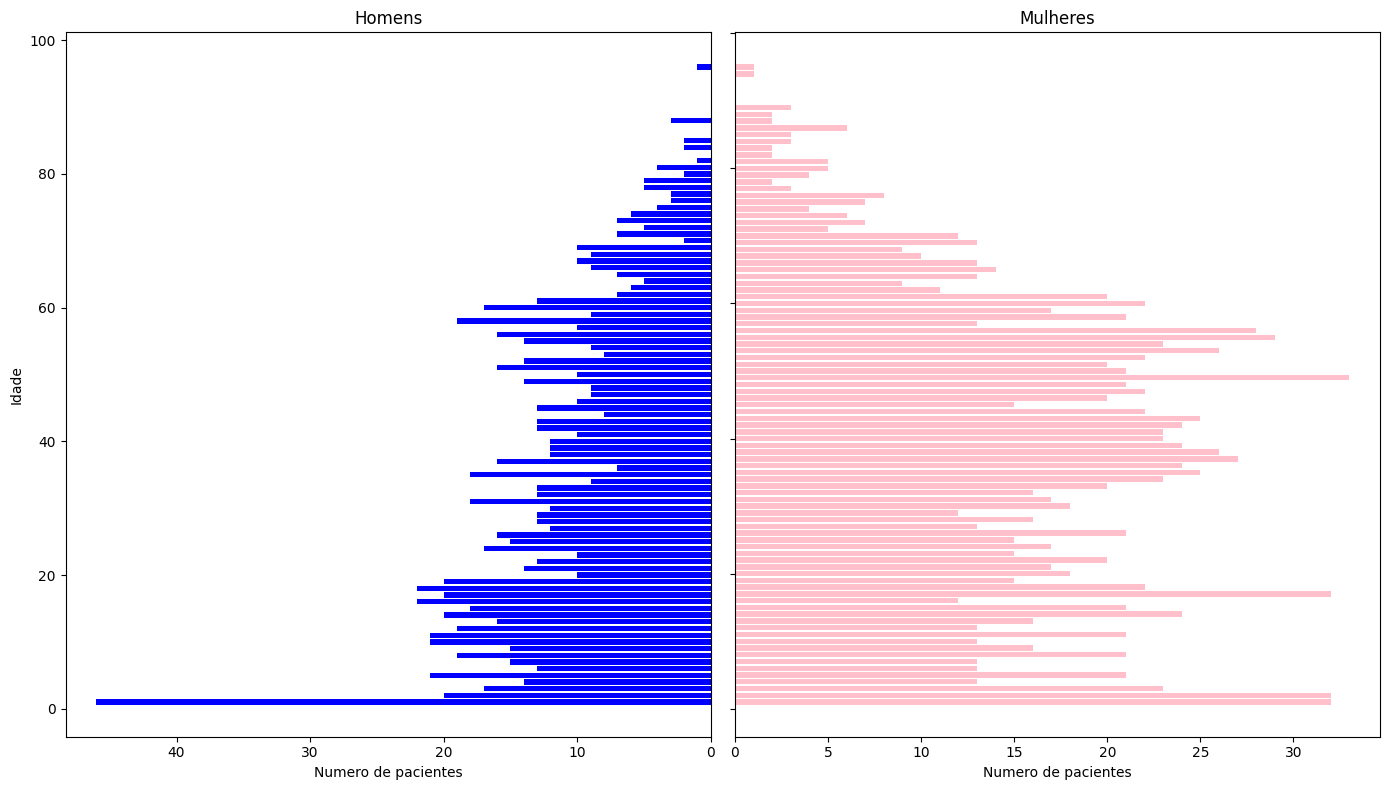

In [121]:
# Definir cores por sexo
cores = {"M": "blue", "F": "pink"}

# Criar figura e subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Gráfico para homens
ax1.barh(tabela_agrupada_masculino["numero_idade"], tabela_agrupada_masculino["Numero de pacientes"], color=cores["M"])
ax1.set_xlabel("Numero de pacientes")
ax1.set_title("Homens")
ax1.set_ylabel("Idade") 
ax1.invert_xaxis() 

# Gráfico para mulheres
ax2.barh(tabela_agrupada_feminino["numero_idade"], tabela_agrupada_feminino["Numero de pacientes"], color=cores["F"])
ax2.set_xlabel("Numero de pacientes")
ax2.set_title("Mulheres")
ax1.set_ylabel("Idade")
ax2.set_yticklabels([])

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Salvar figura em um único arquivo PNG
fig.savefig("piramide_etaria_completa.png")

# Export Final

In [119]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201404,201404,604500017,âäâ{{}ä|üüüäé,4,44,20140402,F,99,330250,...,0,0,G406,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Magé,2014-04-01,44 anos,44.0
1,201404,201404,604500050,âäâ{{{}âäüâ{ää,4,58,20140402,M,99,330025,...,0,0,G401,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Arraial do Cabo,2014-04-01,58 anos,58.0
2,201404,201404,604500076,âäâ{{}~âââäÇ}~,4,24,20140402,M,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2014-04-01,24 anos,24.0
3,201404,201404,604500017,âäâ{{|{{Çâ|~ââ,4,80,20140402,F,99,330570,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Sumidouro,2014-04-01,80 anos,80.0
4,201404,201404,604500050,é{âü{üÇâ{ü}éâââ,4,23,20140402,F,99,330390,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Petrópolis,2014-04-01,23 anos,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26287,202309,202309,604190018,âäâ{{ü}âÇâÇéé~,4,1,20230704,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-09-01,1 anos,1.0
26288,202309,202309,604500106,é{Ç{{â}â{}~~Ç~,4,23,20230614,F,3,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-09-01,23 anos,23.0
26289,202309,202309,604500122,é{~}{âü}~{ääü,4,2,20230519,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-09-01,2 anos,2.0
26290,202309,202309,604190018,é{ü{{ü}~||ä}},4,3,20230706,M,3,330240,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Macaé,2023-09-01,3 anos,3.0


In [ ]:
# Export

rj_epilepsia_total.to_csv('../Dados/Base atualizada/rj_epilepsia_total.csv', sep =';')